# <center>CIVE96008: Dynamics of Structures</center>

## <center>Vibration-control</center>

Dr C Málaga-Chuquitaype [email](mailto://c.malaga@imperial.ac.uk)

[Emerging Structural Technologies Research Group][]

[Emerging Structural Technologies Research Group]: http://www.imperial.ac.uk/emerging-structural-technologies

***

In [17]:
# Import the NumPy functions with namespace (nickname) np
import numpy as np

In [10]:
# Import the plotting functions
import matplotlib.pyplot as plt

In [11]:
# Se-up to display plots inline
%matplotlib inline

In [12]:
# Create a time array/vector of 0-25s with 5001 samples
b = np.linspace(0.000,2.5, 5000)

***

## Design controlled by forces

The reaction force s is

$s=ku(t)+c\dot{u}(t) = F(t)-m\ddot{u}(t)$

$s = S_0\sin{(\omega t - \phi + \phi_1)}$

$H_s = \sqrt{\dfrac{1 + (2 \xi \beta)^2}{(1-\beta)^2 + (2\xi\beta)^2}}$

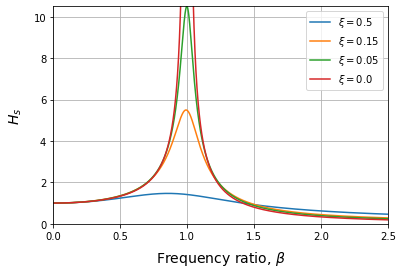

In [13]:
xi1=0.50
xi2=0.10
xi3=0.05
xi4=0
Hs1=np.sqrt((1+(2*xi1*b**2))/((1-b**2)**2+(2*xi1*b)**2))
Hs2=np.sqrt((1+(2*xi2*b**2))/((1-b**2)**2+(2*xi2*b)**2))
Hs3=np.sqrt((1+(2*xi3*b**2))/((1-b**2)**2+(2*xi3*b)**2))
Hs4=np.sqrt((1+(2*xi4*b**2))/((1-b**2)**2+(2*xi4*b)**2))
line1, = plt.plot(b, Hs1, label=r'$\xi=0.5$')
line2, = plt.plot(b, Hs2, label=r'$\xi=0.15$')
line3, = plt.plot(b, Hs3, label=r'$\xi=0.05$')
line4, = plt.plot(b, Hs4, label=r'$\xi=0.0$')
plt.ylim(0, 10.5)
plt.xlim(0, 2.5)
plt.legend(handles=[line1, line2, line3, line4], loc='best')
plt.xlabel('Frequency ratio, '  r'$\beta$', fontsize=14,labelpad=8)
plt.ylabel(r'$H_s$', fontsize=14,labelpad=10)
plt.grid()
plt.show()

# TMD - Vibration absorbers

# 1) Undamped dynamic vibration absorver

When an additional mass $m_2$ to a structure of mass $m_1$ by means of a spring of stiffnes $k_2$, the equations of motion of the 2-DOF system are:

$m_1\ddot{u}_1 + k_1 u_1 + k_2 (u_1 - u_2) = F_0 \sin{\omega t}$

$m_2 \ddot{u}_2 + k_2 (u_2 - u_1) = 0$

If a harmonic motion is assumed:

$u(t) = U \sin{\omega t}$

The steady-state displacement amplitudes of the masses $m_1$ and $m_2$ are:

$U_1 = \dfrac{(k_2 - m_2 \omega^2)F_0}{(k_1 - k_2 - m_1 \omega^2)(k_2-m_2\omega^2)-k_2^2}$

$U_1 = \dfrac{k_2F_0}{(k_1 - k_2 - m_1 \omega^2)(k_2-m_2\omega^2)-k_2^2}$

In order to make $U_1$ zero then:

$\omega^2 = \dfrac{k_2}{m_2}$

By recalling our previous definitions of static displacement and natural circular frequency:

$u_{st} = \dfrac{F_0}{k_1}$, $\omega_1 = \sqrt{\dfrac{k_1}{m_1}}$

Likewise, the natural frequency of the tuned mass damper is:


$\omega_2 = \sqrt{\dfrac{k_2}{m_2}}$

The pevious equations can be re-written as:

$\dfrac{U_1}{u_{st}} = \dfrac{1-\left( \dfrac{\omega}{\omega_2}\right)^2}{\left( 1 + \dfrac{k_2}{k_1} - \left( \dfrac{\omega}{\omega_1}\right)^2\right)\left( 1 - \left( \dfrac{\omega}{\omega_2}\right)^2\right) - \dfrac{k_2}{k_1}}$

$\dfrac{U_2}{u_{st}} = \dfrac{1}{\left( 1 + \dfrac{k_2}{k_1} - \left( \dfrac{\omega}{\omega_1}\right)^2\right)\left( 1 - \left( \dfrac{\omega}{\omega_2}\right)^2\right) - \dfrac{k_2}{k_1}}$

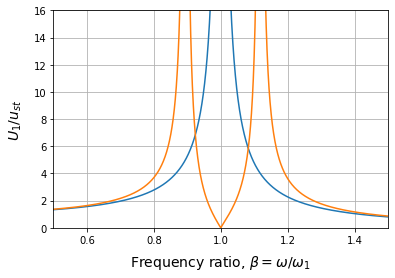

In [14]:
# Create a time array/vector of 0-25s with 5001 samples
b = np.linspace(0.000,2.5, 5000)

xi=0.00 # No damping
H1=np.sqrt(1/((1-b**2)**2+(2*xi*b)**2))

#For a mass ratio of (m2/m1)...
mr=1/20
#... the stiffness ratio is:
kr = (1)**2*mr
# for w_1 = w_2
H2=abs((1-b**2)/((1+kr-b**2)*(1-b**2)-kr))
line1, = plt.plot(b, H1, label=r'$\xi=0.05$')
line2, = plt.plot(b, H2, label=r'$\xi=0.15$')
plt.ylim(0, 16)
plt.xlim(0.5, 1.5)
#plt.legend(handles=[line1, line2, line3, line4], loc='best')
plt.xlabel('Frequency ratio, '  r'$\beta = \omega/\omega_1$', fontsize=14,labelpad=8)
plt.ylabel(r'$U_{1}/u_{st}$', fontsize=14,labelpad=10)
plt.grid()
plt.show()

# 2) Damped dynamic vibration absorver

If the additional mass $m_2$ is attached to the by means through both a spring of stiffnes $k_2$ and a damper of damping $c_2$, the new equations of motion of the 2-DOF system are:

$m_1\ddot{u}_1 + k_1 u_1 + k_2 (u_1 - u_2) + c_2 (\dot{u}_1 - \dot{u_2}) = F_0 \sin{\omega t}$

$m_2 \ddot{u}_2 + k_2 (u_2 - u_1) + c_2 (\dot{u}_2 - \dot{u_1}) = 0$

In this case we will be using a complex exponential anzats:

$u(t) = U e^{i \omega t}$

And the steady-state displacement solution for masses $m_1$ and $m_2$ are:

$U_1 = \dfrac{(k_2 - m_2 \omega^2 + i c_2 \omega)F_0}{\left((k_1- m_1\omega^2)(k_2-m_2 \omega^2) - m_2 k_2 \omega^2\right) + i \omega c_2 (k_1 - m_1\omega^2 - m_2 \omega^2)}$

$U_1 = \dfrac{U_1 (k_2 + i \omega c_2)}{(k_2-m_2\omega^2+i \omega c_2)}$

We can define  the following relationships:

Mass ratio, $\mu = \dfrac{m_2}{m_1}$

Static displacement of the structure, $u_{st} = \dfrac{F_0}{k_1}$

Circular frequency of the vibration absorver, $\omega_d = \sqrt{\dfrac{k_2}{m_2}}$

Natural circular frequency of the main strucutre, $\omega_n = \sqrt{\dfrac{k_1}{m_1}}$

Frequency ratio, $\rho=\dfrac{\omega_d}{\omega_n}$

Force frequency ratio, $\beta = \dfrac{\omega}{\omega_n}$ 

Critical damping coefficient, $c_c = 2m_2 \omega_n$

Damping ratio, $\xi = \dfrac{c_2}{c_c}$

And the normalized magnitudes of $U_1$ and $U_2$ are:

$\dfrac{U_1}{u_{st}} = \sqrt{\dfrac{(2 \xi \beta)^2 + (\beta^2 - \rho^2)^2}{(2 \xi \beta)^2 (\beta^2 - 1 + \mu \beta^2)^2 + \left( \mu \rho^2 \beta^2 - (\beta^2-1)(\beta^2 - \rho^2)\right)^2}}$

$\dfrac{U_2}{u_{st}} = \sqrt{\dfrac{(2 \xi \beta)^2 + \rho^4}{(2 \xi \beta)^2 (\beta^2 - 1 + \mu \beta^2)^2 + \left( \mu \rho^2 \beta^2 - (\beta^2-1)(\beta^2 - \rho^2)\right)^2}}$

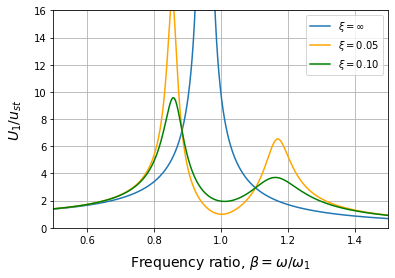

In [15]:
# Create a time array/vector of 0-25s with 5001 samples
b = np.linspace(0.000,2.5, 5000)

xi1=10000000 # Large damping (inf)
xi2=0.05 # No damping
xi3=0.10 # No damping
#For a mass ratio of (m2/m1) mu:
mr= 0.1
#Frequency ratio, rho of:
r = 1 # for w_d = w_n

H1a=(2*xi1*b)**2+(b**2 -r**2)**2
H1b=((2*xi1*b)**2)*(b**2-1+mr*b**2)**2
H1c=(mr*r**2*b**2-(b**2-1)*(b**2-r**2))**2
H1=abs(np.sqrt(H1a/(H1b+H1c)))

H2a=(2*xi2*b)**2+(b**2 -r**2)**2
H2b=((2*xi2*b)**2)*(b**2-1+mr*b**2)**2
H2c=(mr*r**2*b**2-(b**2-1)*(b**2-r**2))**2
#H2=abs((1-b**2)/((1+kr-b**2)*(1-b**2)-kr))
H2=abs(np.sqrt(H2a/(H2b+H2c)))

H3a=(2*xi3*b)**2+(b**2 -r**2)**2
H3b=((2*xi3*b)**2)*(b**2-1+mr*b**2)**2
H3c=(mr*r**2*b**2-(b**2-1)*(b**2-r**2))**2
#H2=abs((1-b**2)/((1+kr-b**2)*(1-b**2)-kr))
H3=abs(np.sqrt(H3a/(H3b+H3c)))

#H3=np.sqrt(((2*cr*b)**2+(b**2-rho**2)**2)/((2*cr*b)**2*(b**2-1+mu*b**2)**2+(mu*rho**2*b**2-(b**2-1)*(b**2-rho**2))**2))
line1, = plt.plot(b, H1, label=r'$\xi=\infty$')
line2, = plt.plot(b, H2, label=r'$\xi=0.05$', color='orange')
line3, = plt.plot(b, H3, label=r'$\xi=0.10$',color = 'green')
plt.ylim(0, 16)
plt.xlim(0.5, 1.5)
plt.legend(handles=[line1, line2, line3], loc='best')
plt.xlabel('Frequency ratio, '  r'$\beta = \omega/\omega_1$', fontsize=14,labelpad=8)
plt.ylabel(r'$U_{1}/u_{st}$', fontsize=14,labelpad=10)
plt.grid()
plt.show()

Minimum relative displacement under external harmonic load:  

$\rho\biggl|_{opt} = \dfrac{1}{1+\mu}$,     $\dfrac{c}{c_d}\biggl|_{opt} = \sqrt{\dfrac{3\mu}{8(1+\mu)^3}}$

Minimum relative acceleration under external harmonic load:

$\rho\biggl|_{opt} = \dfrac{1}{\sqrt{1+\mu}}$,     $\dfrac{c}{c_d}\biggl|_{opt} = \sqrt{\dfrac{3\mu}{8(1+\mu/2)}}$

Minimum relative displacement under harmonic base motion:  

$\rho\biggl|_{opt} = \dfrac{\sqrt{1-\mu/2}}{1+\mu}$,     $\dfrac{c}{c_d}\biggl|_{opt} = \sqrt{\dfrac{3\mu}{8(1+\mu)(1-\mu/2)}}$

Minimum absolute acceleration under harmonic base motion:

$\rho\biggl|_{opt} = \dfrac{1}{1+\mu}$,     $\dfrac{c}{c_d}\biggl|_{opt} = \sqrt{\dfrac{3\mu}{8(1+\mu)}}$

# Expressions for LTMD (Sloshing dampers)

$m_{w} = \rho_w L b h$

$m_{eff} = \dfrac{8L}{\pi^3h}\tanh{\left(\dfrac{\pi h}{L}\right)}m_w$

$k_{eff} = \dfrac{8 \rho_w bLg}{\pi^2}\tanh^2{\left(\dfrac{\pi h}{L}\right)} $

$\omega_{eff} = \sqrt{\dfrac{\pi g}{L}\tanh{\left(\dfrac{\pi h}{L}\right)}}$

$\xi_{eff} = \left(\dfrac{1}{2h} \right) \sqrt{\dfrac{\nu_w}{2 \omega_{eff}}} \left(1 + \dfrac{2h}{b} + SC \right)$

$c_{eff} = 2 \xi_{eff} me_{eff} \omega_{eff}$